**Programmed by Ivanov Yuriy**

In [63]:
from implementation_of_algorithms import *
# PreMaxvol, maxvol, rect_maxvol, maxvol2, householder, HouseholderMaxvol2, DominantC, LowRankApproximation

In [64]:
import random
# random.seed(42)

A = np.random.uniform(low=-10, high=10, size= (12,10))
# + np.hstack([np.zeros(10*12).reshape(12,10), np.random.randint(-10, 10, 24).reshape(12,2)])
A

array([[ 9.6365771 ,  0.38136081,  6.27703957, -6.2725581 ,  5.05876286,
        -0.13942683, -6.15766483,  8.83457471, -6.79975237,  0.95914204],
       [-9.86278312, -9.08857138,  3.64203169, -1.40269049,  4.37219544,
        -9.7119972 ,  6.69817506,  7.80000278,  5.2399447 ,  3.60635132],
       [ 6.45243543, -0.15271235, -3.93000985, -2.74345041,  6.08441744,
         7.12224397,  3.08114975, -0.33478308,  0.11247871,  1.04557846],
       [ 0.9400288 ,  7.058667  , -2.87883124,  8.90860465,  5.86216385,
        -6.0578095 , -7.59934145, -0.04558725,  2.75298391, -8.61311425],
       [ 9.97839243, -7.35160226,  2.51959317,  5.65802945, -0.54483475,
        -8.86828381,  0.03558336,  1.36295101, -8.72939749,  2.05580655],
       [ 3.04310277, -0.07598517,  4.07445224, -2.41242764, -2.67075705,
         6.39051917, -9.64401679, -2.2841939 ,  3.94466271,  9.75870374],
       [-4.03714789, -5.33634427,  0.07621652, -9.66357208, -7.2191698 ,
         5.04669419, -8.63588613, -3.04634335

In [65]:
tiny_matrix = np.random.randint(-5, 5, 4)
tiny_matrix = tiny_matrix.reshape(2, 2)
tiny_matrix

array([[-1,  0],
       [ 3,  1]])

In [66]:
big_matrix = np.random.randint(-100, 100, 100)
big_matrix = big_matrix.reshape(20, 5)

In [67]:
%%time

from tqdm.auto import tqdm
from itertools import combinations


def calculate_det(A, ind):
    return np.sqrt(np.abs(np.linalg.det(A[ind].T @ A[ind])))

def maxdet(A):
    """ maxvol делает то же самое
        Принимает на вход матрицу размера N*r, возвращает наибольший volume среди всех матриц размера r*r
    """
    arange_N = np.arange(A.shape[0])
    r = A.shape[1]
    maxdet = 0
    for subset in combinations(arange_N, r):
        # Ap = A[list(subset)]
        Ap_det = calculate_det(A, list(subset)) # np.sqrt(np.abs(np.linalg.det(Ap.T @ Ap)))
        if Ap_det > maxdet:
            maxdet = Ap_det
    return maxdet


# def maxdet(A):
#     """
#     A (Nxr) - square or rectangular  matrix with N>=r
#     """
#     N, r = A.shape[0], A.shape[1]
#     arange_N = np.arange(N)
#     maxdet = 0
#     for len_p in tqdm(range(r, N + 1)):
#         for subset in combinations(arange_N, len_p):
#             Ap = A[list(subset)]
#             Ap_det = np.sqrt(np.linalg.det(Ap.T@Ap))
#             if Ap_det > maxdet:
#                 maxdet = Ap_det
#     return maxdet

vol_A_base = maxdet(A)
vol_A_base

Wall time: 6.62 ms


32086319334.21815

In [ ]:
%%time
vol_big_base = maxdet(big_matrix)

In [ ]:
# N, r = 10, 4
# A = np.random.randn(N, r)
# A.shape

**Algorithm pre-maxvol:**

Input: $M\in\mathbb{R}^{m\times n}$, the required rank $r$.

Output: set of column indices $\mathcal{I}, \vert\mathcal{I} \vert =r$,corresponding to the submatrix, whose
volume differs from the maximum by no more than $r!$ times.

**MaxVol**

**Input**: $A \in \mathbb{C}^{N\times r}$, where $N>r$.

**Output**: set of row indices $\mathcal{I}, \vert \mathcal{I}\vert = r$, which corresponds to a dominant submatrix $r\times r$.

**MaxVol2:**

Input: $A\in\mathbb{R}^{M\times r}$, set of indices $\mathcal{I}, \vert \mathcal{I}\vert =r$ to update by adding rows, $n\geq r\in \mathbb{N}.$ 

Output: set of row indices $\mathcal{I}_{1}, \vert \mathcal{I}_{1}\vert =n$, which corresponds to a submatrix $n\times r$ with indices chosen greedily to maximize the volume.


**Householder-based maxvol2 algorithm:**

Input: $A\in\mathbb{R}^{M\times r}$, set of indices $\mathcal{I}, \vert \mathcal{I}\vert =r$ to update by adding rows, $n\geq r\in \mathbb{N}.$ 

Output: set of row indices $\mathcal{I}_{1}, \vert \mathcal{I}_{1}\vert =n$, which corresponds to a submatrix $n\times r$ with indices chosen greedily to maximize the volume.

**DominantC:**

Input: $A\in\mathbb{R}^{M\times r}$, set of indices $\mathcal{I}, \vert \mathcal{I}\vert =n$ to update. 

Output: set of row indices $\mathcal{I}_{1}$, which corresponds to a dominant submatrix $n\times r$.

**premaxvol->maxvol2-householder**

In [5]:
def find_rectang_volume(A):
    return np.sqrt(np.linalg.det(A.T@A))
# PreMaxvol, maxvol, rect_maxvol, maxvol2, householder, HouseholderMaxvol2, DominantC, LowRankApproximation

In [ ]:
# A (12x10)
I_1 = PreMaxvol(A.T, 10)
I_2 = HouseholderMaxvol2(A, I_1, 11)
print(I_1, I_2)

In [ ]:
find_rectang_volume(A[I_2, :]) / vol_A_base

**maxvol->maxvol2-householder->dominantC**

In [ ]:
# A (12x10)
I = maxvol(A)
print(I)
I_new = maxvol2(A, I, 11)
print(I_new)
I_dominant = DominantC(A, I_new)
print(I_dominant)

In [ ]:
find_rectang_volume(A[I_dominant, :]) / vol_A_base

**maxvol->maxvol2-householder**

In [20]:
# A (12x10)
I_maxvol = maxvol(A)
print(I_maxvol)
I_householder = HouseholderMaxvol2(A, I_maxvol, 11)
print(I_householder)

[ 0  3  9  5  2  4  7 10  1  6]
[ 0  3  9  5  2  4  7 10  1  6  8]


In [ ]:
find_rectang_volume(A[I_householder, :]) / vol_A_base

In [15]:
%%time
times = 20
case_0 = []
case_1 = []
case_2 = []
case_3 = []

for i in tqdm(range(1, times)):
#     N = int((i + 5) if (i + 5) < 30 else N + np.random.randomint(-3, 3, 1))
#     r = int((i % 30) + 0.05*N)
    N = 200
    r = 50
#     print(N, r)
    rand_mat = np.random.uniform(-1, 1, (N, r))
    
    #base
#     vol_mat_base = maxdet(rand_mat)

    #case 0 maxvol -> HouseHolder -> DominantC
    I_maxvol = maxvol(rand_mat)
    I_householder = HouseholderMaxvol2(rand_mat, I_maxvol, min(N, r) + 50)
    I_dominant = DominantC(rand_mat, I_householder)
    vol_0 = find_rectang_volume(rand_mat[I_dominant, :])
    
    #case 1 PreMaxvol -> HouseHolder -> DominantC
    I_1 = PreMaxvol(rand_mat.T, min(N, r))
    I_2 = HouseholderMaxvol2(rand_mat, I_1, min(N, r) + 50)
    I_dominant = DominantC(rand_mat, I_2)
    vol_1 = find_rectang_volume(rand_mat[I_dominant, :])
    
    #case 2 maxvol -> HouseHolder
    I_maxvol = maxvol(rand_mat)
    I_householder = HouseholderMaxvol2(rand_mat, I_maxvol, min(N, r) + 50)
    vol_2 = find_rectang_volume(rand_mat[I_householder, :])
    
    #case 3 PreMaxvol -> HouseHolder
    I_1 = PreMaxvol(rand_mat.T, min(N, r))
    I_2 = HouseholderMaxvol2(rand_mat, I_1, min(N, r) + 50)
    vol_3 = find_rectang_volume(rand_mat[I_2, :])
    
    case_0.append(vol_0)
    case_1.append(vol_1)
    case_2.append(vol_2)
    case_3.append(vol_3)
#     case_1.append(vol_1 / vol_mat_base)
#     case_2.append(vol_1 / vol_mat_base)
#     case_3.append(vol_1 / vol_mat_base)

print("maxvol -> HouseHolder -> DominantC: \t", np.mean(case_0))
print("PreMaxvol -> HouseHolder -> DominantC: \t", np.mean(case_1))
print("maxvol -> HouseHolder: \t", np.mean(case_2))
print("PreMaxvol -> HouseHolder: \t", np.mean(case_3))

  0%|          | 0/19 [00:00<?, ?it/s]

200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
200 50
maxvol -> HouseHolder -> DominantC: 	 2.8478976717384526e+36
PreMaxvol -> HouseHolder -> DominantC: 	 2.8777263468731084e+36
maxvol -> HouseHolder: 	 6.477828283989968e+35
PreMaxvol -> HouseHolder: 	 7.099075330607921e+35
Wall time: 3.62 s


**200 на 50 фикс, меняется матрица, до которой достраиваем (её размер)**

200x50 -> 51x50, 52x50, 53x50

**фикс кол-во столбцов и строк, а размер матрицы меняется (кол-во строк)**

Nx50 -> 100x50

**для маленьких матриц проверить**

## Графики для сравнения

In [40]:
def plot_volume_row_changing(row, rank, addition_to, repeats=25):
    """
    row > rank (rank = col)
    addition_to
    case 0 maxvol -> HouseHolder -> DominantC
    case 1 PreMaxvol -> HouseHolder -> DominantC
    case 2 maxvol -> HouseHolder
    case 3 PreMaxvol -> HouseHolder
    """
    vol_case_0 = []
    vol_case_1 = []
    vol_case_2 = []
    vol_case_3 = []
    ind = []

    for i, rank_add in enumerate(range(rank, rank + addition_to)):
        ind.append(rank_add)
        case_0_iter = []
        case_1_iter = []
        case_2_iter = []
        case_3_iter = []
        for j in range(repeats):
            rand_mat = np.random.randn(row, rank)
            
            #case 0 maxvol -> HouseHolder -> DominantC
            I_maxvol = maxvol(rand_mat)
            I_householder = HouseholderMaxvol2(rand_mat, I_maxvol, rank_add)
            I_dominant = DominantC(rand_mat, I_householder)
            vol_0 = find_rectang_volume(rand_mat[I_dominant, :])

            #case 1 PreMaxvol -> HouseHolder -> DominantC
            I_premaxvol = PreMaxvol(rand_mat.T, rank)
            I_householder = HouseholderMaxvol2(rand_mat, I_premaxvol, rank_add)
            I_dominant = DominantC(rand_mat, I_householder)
            vol_1 = find_rectang_volume(rand_mat[I_dominant, :])

            #case 2 maxvol -> HouseHolder
            I_maxvol = maxvol(rand_mat)
            I_householder = HouseholderMaxvol2(rand_mat, I_maxvol, rank_add)
            vol_2 = find_rectang_volume(rand_mat[I_householder, :])

            #case 3 PreMaxvol -> HouseHolder
            I_premaxvol = PreMaxvol(rand_mat.T, rank)
            I_householder = HouseholderMaxvol2(rand_mat, I_premaxvol, rank_add)
            vol_3 = find_rectang_volume(rand_mat[I_householder, :])
            
            case_0_iter.append(vol_0)
            case_1_iter.append(vol_1)
            case_2_iter.append(vol_2)
            case_3_iter.append(vol_3)
            
            
        vol_case_0.append(np.mean(case_0_iter))
        vol_case_1.append(np.mean(case_1_iter))
        vol_case_2.append(np.mean(case_2_iter))
        vol_case_3.append(np.mean(case_3_iter))

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlabel('Number of added rows')
    ax.set_ylabel('Volume')
    ax.set_title(f'Compare algorithms, rank = {rank}')

    plt.plot(ind, vol_case_0, label='maxvol -> HouseHolder -> DominantC', color='y')
    plt.plot(ind, vol_case_1, label='PreMaxvol -> HouseHolder -> DominantC', color='g')
    plt.plot(ind, vol_case_2, label='maxvol -> HouseHolder', color='r')
    plt.plot(ind, vol_case_3, label='PreMaxvol -> HouseHolder', color='b')
    plt.legend()
    plt.show()

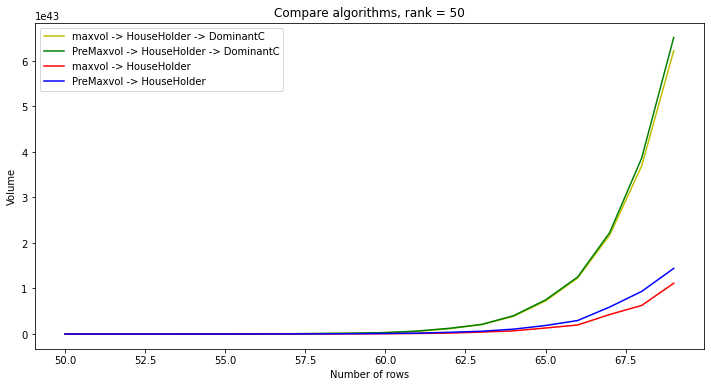

Wall time: 1min 4s


In [41]:
%%time
plot_volume_row_changing(row=200, rank=50, addition_to=20, repeats=25)

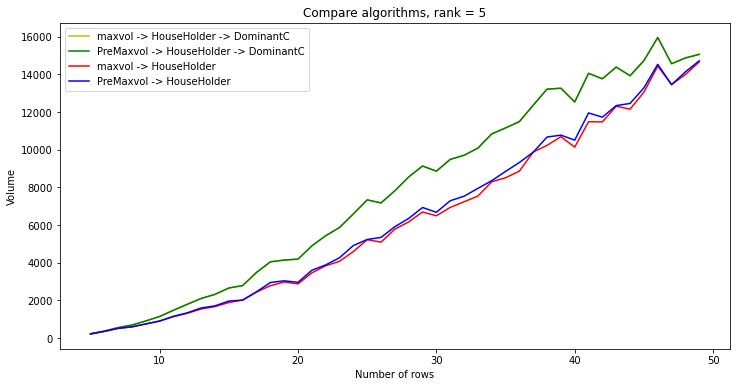

Wall time: 40.5 s


In [62]:
%%time
plot_volume_row_changing(row=50, rank=5, addition_to=45, repeats=50)

In [60]:
def plot_volume_shape_changing(rank, addition, row_to, repeats=25):
    """
    row > rank (rank = col)
    addition_to
    case 0 maxvol -> HouseHolder -> DominantC
    case 1 PreMaxvol -> HouseHolder -> DominantC
    case 2 maxvol -> HouseHolder
    case 3 PreMaxvol -> HouseHolder
    """
    vol_case_0 = []
    vol_case_1 = []
    vol_case_2 = []
    vol_case_3 = []
    ind = []

    for i, row_init in enumerate(range(addition + 1, row_to)):
        ind.append(row_init)
        case_0_iter = []
        case_1_iter = []
        case_2_iter = []
        case_3_iter = []
        for j in range(repeats):
            rand_mat = np.random.randn(row_init, rank)
            print(rand_mat.shape)
            
            #case 0 maxvol -> HouseHolder -> DominantC
            I_maxvol = maxvol(rand_mat)
            I_householder = HouseholderMaxvol2(rand_mat, I_maxvol, addition)
            I_dominant = DominantC(rand_mat, I_householder)
            vol_0 = find_rectang_volume(rand_mat[I_dominant, :])

            #case 1 PreMaxvol -> HouseHolder -> DominantC
            I_premaxvol = PreMaxvol(rand_mat.T, rank)
            I_householder = HouseholderMaxvol2(rand_mat, I_premaxvol, addition)
            I_dominant = DominantC(rand_mat, I_householder)
            vol_1 = find_rectang_volume(rand_mat[I_dominant, :])

            #case 2 maxvol -> HouseHolder
            I_maxvol = maxvol(rand_mat)
            I_householder = HouseholderMaxvol2(rand_mat, I_maxvol, addition)
            vol_2 = find_rectang_volume(rand_mat[I_householder, :])

            #case 3 PreMaxvol -> HouseHolder
            I_premaxvol = PreMaxvol(rand_mat.T, rank)
            I_householder = HouseholderMaxvol2(rand_mat, I_premaxvol, addition)
            vol_3 = find_rectang_volume(rand_mat[I_householder, :])
            
            case_0_iter.append(vol_0)
            case_1_iter.append(vol_1)
            case_2_iter.append(vol_2)
            case_3_iter.append(vol_3)
            
            
        vol_case_0.append(np.mean(case_0_iter))
        vol_case_1.append(np.mean(case_1_iter))
        vol_case_2.append(np.mean(case_2_iter))
        vol_case_3.append(np.mean(case_3_iter))

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlabel('Number of initial rows')
    ax.set_ylabel('Volume')
    ax.set_title(f'Compare algorithms, rank = {rank}')

    plt.plot(ind, vol_case_0, label='maxvol -> HouseHolder -> DominantC', color='y')
    plt.plot(ind, vol_case_1, label='PreMaxvol -> HouseHolder -> DominantC', color='g')
    plt.plot(ind, vol_case_2, label='maxvol -> HouseHolder', color='r')
    plt.plot(ind, vol_case_3, label='PreMaxvol -> HouseHolder', color='b')
    plt.legend()
    plt.show()

101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
101 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
102 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
103 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50
104 100 50

130 100 50
130 100 50
130 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
131 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
132 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
133 100 50
134 100 50
134 100 50
134 100 50
134 100 50
134 100 50
134 100 50
134 100 50
134 100 50
134 100 50
134 100 50
134 100 50
134 100 50
134 100 50

160 100 50
160 100 50
160 100 50
160 100 50
160 100 50
160 100 50
160 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
161 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
162 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
163 100 50
164 100 50
164 100 50
164 100 50
164 100 50
164 100 50
164 100 50
164 100 50
164 100 50
164 100 50

190 100 50
190 100 50
190 100 50
190 100 50
190 100 50
190 100 50
190 100 50
190 100 50
190 100 50
190 100 50
190 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
191 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
192 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
193 100 50
194 100 50
194 100 50
194 100 50
194 100 50
194 100 50

220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
220 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
221 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
222 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50
223 100 50

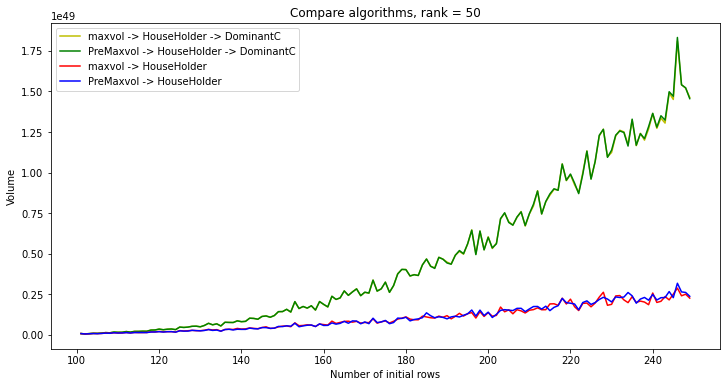

Wall time: 9min 11s


In [51]:
%%time
plot_volume_shape_changing(rank=50, addition=100, row_to=150, repeats=25)

(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(6, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)
(8, 2)

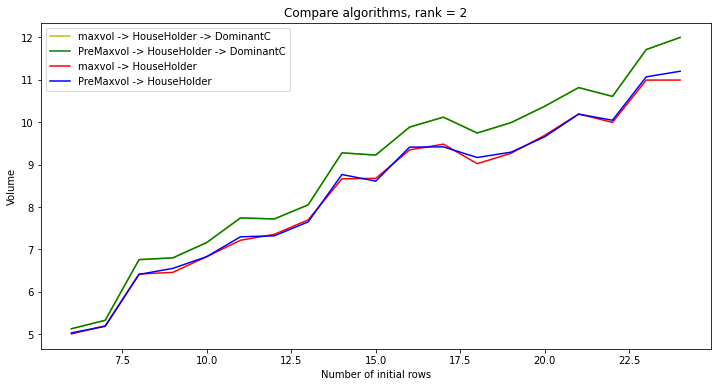

Wall time: 6.01 s


In [61]:
%%time
plot_volume_shape_changing(rank=2, addition=5, row_to=25, repeats=50)